In [1]:
import pandas as pd
book1 = pd.read_csv('datasets/book1.csv')
print(book1.head())

                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1  


In [2]:
import networkx as nx
G_book1 = nx.Graph()
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

##### Finding most important characters from the first book (book[0]) to the fifth book (book[4])

In [5]:
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book5 = nx.degree_centrality(books[4])
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x: x[1], reverse=True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x: x[1], reverse=True)[0:10]

print(sorted_deg_cen_book1, sorted_deg_cen_book5)

[('Eddard-Stark', 0.3548387096774194), ('Robert-Baratheon', 0.2688172043010753), ('Tyrion-Lannister', 0.24731182795698928), ('Catelyn-Stark', 0.23118279569892475), ('Jon-Snow', 0.19892473118279572), ('Robb-Stark', 0.18817204301075272), ('Sansa-Stark', 0.18817204301075272), ('Bran-Stark', 0.17204301075268819), ('Cersei-Lannister', 0.16129032258064518), ('Joffrey-Baratheon', 0.16129032258064518)] [('Jon-Snow', 0.1962025316455696), ('Daenerys-Targaryen', 0.18354430379746836), ('Stannis-Baratheon', 0.14873417721518986), ('Tyrion-Lannister', 0.10443037974683544), ('Theon-Greyjoy', 0.10443037974683544), ('Cersei-Lannister', 0.08860759493670886), ('Barristan-Selmy', 0.07911392405063292), ('Hizdahr-zo-Loraq', 0.06962025316455696), ('Asha-Greyjoy', 0.056962025316455694), ('Melisandre', 0.05379746835443038)]


#### According to degree centrality, the most important character in the first book is Eddard Stark but he is not even in the top 10 of the fifth book. The importance of characters changes over the course. Let's look at the evolution of degree centrality of a couple of characters like Eddard Stark, Jon Snow, and Tyrion, which showed up in the top 10 of degree centrality in the first book.

<class 'list'>


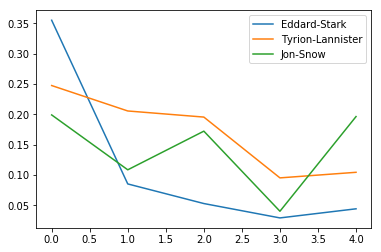

In [6]:
%matplotlib inline

# Creating a list of degree centrality of the books
evol = [nx.degree_centrality(book) for book in books]
print(type(evol))

degree_evol_df = pd.DataFrame.from_records(evol)


degree_evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

#### The importance of Eddard Stark starts dying off as the series progresses. Jon Snow's, however, drops in the fourth book but suddenly rises in the fifth. We will now take the evolution of the top four characters of every book and plot it.

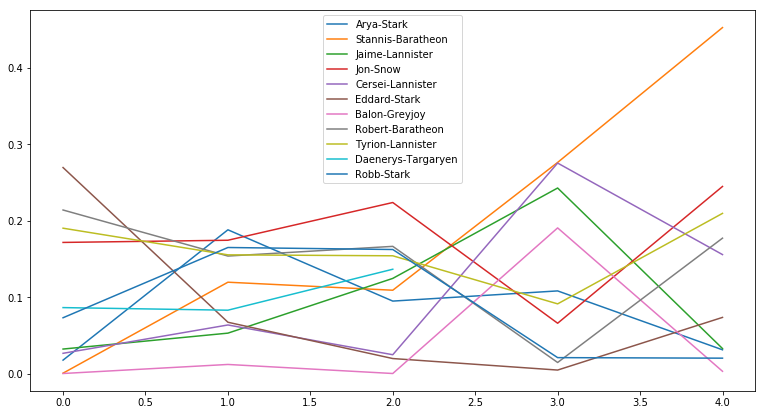

In [7]:
evol = [nx.betweenness_centrality(book) for book in books]

betweenness_evol_df = pd.DataFrame.from_records(evol)

# Finding the top 4 characters in every book
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(betweenness_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

betweenness_evol_df[list_of_char].plot(figsize=(13,7))

#### Stannis Batatheon??? That is a strange rise. In the 5th book he is much more important than any other character even though according to the degree of centrality he is only the third most important character. Let us look at Google PageRank's analysis

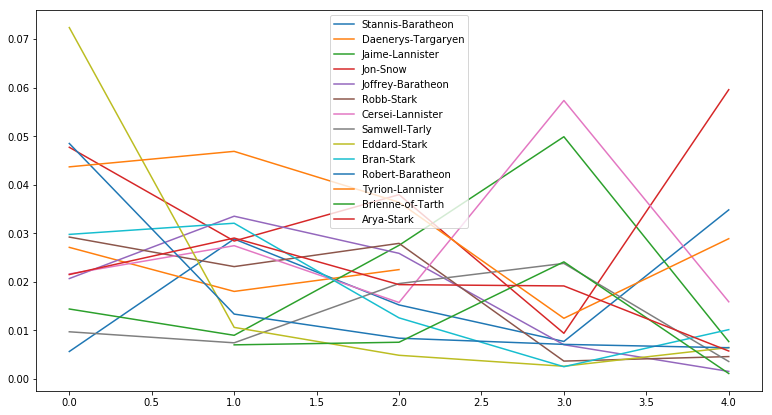

In [8]:
evol = [nx.pagerank(book) for book in books]
pagerank_evol_df = pd.DataFrame.from_records(evol)


set_of_char = set()
for i in range(5):
    set_of_char |= set(list(pagerank_evol_df.T[i].sort_values(ascending=False)[0:4].index))
list_of_char = list(set_of_char)

pagerank_evol_df[list_of_char].plot(figsize=(13,7))

#### Stannis, Jon Snow, and Daenerys = most important in the 5th book, according to Google PageRank. Let us try correlating them.

In [9]:
measures = [nx.pagerank(books[4]), 
            nx.betweenness_centrality(books[4], weight='weight'), 
            nx.degree_centrality(books[4])]

cor = pd.DataFrame.from_records(measures)

cor.idxmax

<bound method DataFrame.idxmax of    Aegon-I-Targaryen  Aegon-Targaryen-(son-of-Rhaegar)  \
0           0.000682                          0.008693   
1           0.000000                          0.049057   
2           0.003165                          0.047468   

   Aemon-Targaryen-(Maester-Aemon)  Aenys-Frey  Aeron-Greyjoy  \
0                         0.003236    0.001745       0.001313   
1                         0.006852    0.000000       0.006277   
2                         0.015823    0.009494       0.006329   

   Aerys-II-Targaryen      Aggo  Alliser-Thorne  Alys-Karstark  \
0            0.001642  0.002365        0.000872       0.002135   
1            0.000000  0.002969        0.000000       0.000000   
2            0.009494  0.018987        0.003165       0.009494   

   Alysane-Mormont        ...          Wun-Weg-Wun-Dar-Wun  Wylis-Manderly  \
0         0.002910        ...                     0.002419        0.000693   
1         0.000498        ...                     0

#### There is a high correlation between the three measures. Who is the most important?

In [45]:
p_rank, b_cent, d_cent = cor.idxmax(axis=1)
for i, v in enumerate(cor.iloc[0,:]):
    if v ==max(cor.iloc[0,:]):
        print(i)

cor.iloc[:,143]

143


0    0.059572
1    0.205652
2    0.196203
Name: Jon-Snow, dtype: float64

#### You know nothing, Jon Snow. Yet, you are the most important.